In [1]:
!pip install pycce
!pip install ase

Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pycce as pc
import ase
from mpl_toolkits import mplot3d


In [4]:
seed = 8805
from ase.build import bulk

# Generate unitcell from ase
diamond = bulk('C', 'diamond', cubic=True)
diamond = pc.read_ase(diamond)
atoms = diamond.gen_supercell(200, remove=[('C', [0., 0, 0]),
                                           ('C', [0.5, 0.5, 0.5])],
                              add=('14N', [0.5, 0.5, 0.5]),
                              seed=seed)

In [5]:
mock = pc.Simulator(spin=1, position=[0,0,0],
                    bath=atoms, r_bath=20,
                    r_dipole=6, order=3)

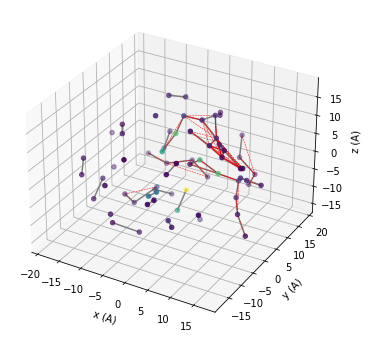

In [6]:
# add 3D axis
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

# We want to visualize the smaller bath
data = mock.bath

# First plot the positions of the bath
colors = np.abs(data.A[:,2,2]/data.A[:,2,2].max())
ax.scatter3D(data.x, data.y, data.z, c=colors, cmap='viridis');
# Plot all pairs of nuclear spins, which are contained
# in the calc.clusters dictionary under they key 2
for c in mock.clusters[2]:
    ax.plot3D(data.x[c], data.y[c], data.z[c], color='grey')
# Plot all triplets of nuclear spins, which are contained
# in the calc.clusters dictionary under they key 3
for c in mock.clusters[3]:
    ax.plot3D(data.x[c], data.y[c], data.z[c], color='red', ls='--', lw=0.5)

ax.set(xlabel='x (A)', ylabel='y (A)', zlabel='z (A)');

In [7]:
# Parameters of CCE calculations engine

# Order of CCE aproximation
order = 2
# Bath cutoff radius
r_bath = 40  # in A
# Cluster cutoff radius
r_dipole = 8  # in A
# position of central spin
position = [0, 0, 0]
# Qubit levels (in Sz basis)
alpha = [0, 0, 1]; beta = [0, 1, 0]
# ZFS Parametters of NV center in diamond
D = 2.88 * 1e6 # in kHz
E = 0 # in kHz
nv = pc.CenterArray(spin=1, position=position, D=D, E=E, alpha=alpha, beta=beta)

In [8]:
calc = pc.Simulator(spin=nv, bath=atoms,
                    r_bath=r_bath, r_dipole=r_dipole, order=order)

In [9]:
# Time points
time_space = np.linspace(0, 2, 201)  # in ms
# Number of pulses in CPMG seq (0 = FID, 1 = HE)
n = 1
# Mag. Field (Bx By Bz)
b = np.array([0, 0, 500])  # in G

l_conv = calc.compute(time_space, pulses=n, magnetic_field=b,
                      method='cce', quantity='coherence', as_delay=False)

In [11]:
# Hahn-echo pulse sequence
pulse_sequence = [pc.Pulse('x', np.pi)]

# Calculate coherence function
l_generatilze = calc.compute(time_space, magnetic_field=b,
                             pulses=pulse_sequence,
                             method='gcce', quantity='coherence')

In [12]:
n_bath_states = 20

# Calculate coherence function
l_gcce = calc.compute(time_space, magnetic_field=b,
                      pulses=pulse_sequence,
                      nbstates=n_bath_states,
                      method='gcce', quantity='coherence', seed=seed)

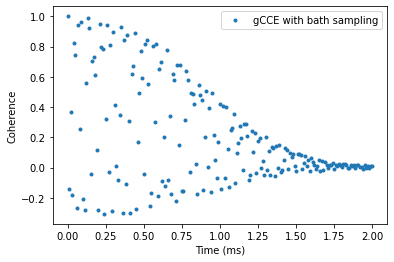

In [15]:
!pip install jupyterthemes

In [18]:
!jt -t monokai